In [1]:
import pathlib

In [2]:
import pandas

In [3]:
import iris
import iris.quickplot

In [4]:
import matplotlib
import matplotlib.pyplot

In [5]:
import xarray

In [11]:
# root_data_dir = pathlib.Path('/project/informatics_lab/precip_rediagnosis')
root_data_dir = pathlib.Path('/scratch/shaddad/precip_rediagnosis')
prd_train_data = root_data_dir / 'train_202207'

In [12]:
list((prd_train_data ).iterdir())

[PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/logs'),
 PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_ciara_2020'),
 PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_dennis'),
 PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_ciara_2020_01')]

In [16]:
event_name = 'storm_ciara_2020'
event_data_dir = prd_train_data / event_name / 'radar'
list((event_data_dir ).iterdir())


[PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_ciara_2020/radar/composite_quality_20200210.nc'),
 PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_ciara_2020/radar/prd_radar_20200207T1800Z_20200210T1800Z.csv'),
 PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_ciara_2020/radar/prd_radar_20200207T1800Z_20200210T1800Z.nc'),
 PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_ciara_2020/radar/composite_quality_2020029.nc'),
 PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_ciara_2020/radar/composite_quality_2020028.nc'),
 PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_ciara_2020/radar/composite_rainfall_20200210.nc'),
 PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_ciara_2020/radar/composite_quality_2020027.nc'),
 PosixPath('/scratch/shaddad/precip_rediagnosis/train_202207/storm_ciara_2020/radar/composite_rainfall_2020028.nc'),
 PosixPath('/scratch/shaddad/precip_red

In [20]:
radar_regridded_fname = 'prd_radar_20200207T1800Z_20200210T1800Z.nc'
radar_regridded_path = event_data_dir / radar_regridded_fname
radar_regridded_path.is_file()

True

In [67]:
radar_grid_raw_fnames = ['composite_rainfall_2020028.nc', 'composite_rainfall_2020029.nc']
radar_grid_raw_path = event_data_dir / radar_grid_raw_fnames[0]
radar_grid_raw_path.is_file()

True

In [22]:
target_cube = iris.load_cube('/project/informatics_lab/precip_rediagnosis/target_cube.nc')
target_cube

<iris 'Cube' of rainfall_rate / (m s-1) (latitude: 52; longitude: 31)>

In [ ]:
(min(target_cube.coord('latitude').points), 
 max(target_cube.coord('latitude').points),
 min(target_cube.coord('longitude').points), 
 max(target_cube.coord('longitude').points),
)

In [55]:
radar_regridded_dataset = iris.load(str(radar_regridded_path))
radar_regridded_dataset

Maximum Rain In Radar Cells Within Mogreps-G Cell (mm),time,latitude,longitude
Shape,12,52,31
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Attributes,,,Conventions CF-1.7
Maximum Rain In Radar Cells Within Mogreps-G Cell (mm),time,latitude,longitude
Shape,12,52,31
Dimension coordinates,,,
time,x,-,-


In [56]:
[cube1.var_name for cube1 in radar_regridded_dataset]

['radar_max_rain_instant',
 'radar_max_rain_aggregate_3hr',
 'radar_fraction_in_band_instant',
 'radar_fraction_in_band_aggregate_3hr',
 'radar_mean_rain_aggregate_3hr',
 'fraction_sum_instant',
 'fraction_sum_agg',
 'radar_mean_rain_instant']

In [57]:
radar_regridded_cube_instant_mean = iris.load_cube(str(radar_regridded_path), 'radar_mean_rain_instant')
radar_regridded_cube_agg3hr_mean = iris.load_cube(str(radar_regridded_path), 'radar_mean_rain_aggregate_3hr')
radar_regridded_cube_instant_mean

Average Rain In Radar Cells Within Mogreps-G Cell (mm),time,latitude,longitude
Shape,12,52,31
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Attributes,,,Conventions CF-1.7


In [58]:
radar_regridded_cube_agg3hr_mean

Average Rain In Radar Cells Within Mogreps-G Cell (mm),time,latitude,longitude
Shape,12,52,31
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Attributes,,,Conventions CF-1.7


In [75]:
radar_grid_raw_cube = iris.cube.CubeList([iris.load_cube(str(event_data_dir / f1)) for f1 in radar_grid_raw_fnames] ).concatenate()[0]
radar_grid_raw_cube

Rainfall Rate Composite (mm/h),time,projection_y_coordinate,projection_x_coordinate
Shape,576,2175,1725
Dimension coordinates,,,
time,x,-,-
projection_y_coordinate,-,x,-
projection_x_coordinate,-,-,x
Auxiliary coordinates,,,
forecast_reference_time,x,-,-
Scalar coordinates,,,forecast_period 0 second
Attributes,,,Conventions CF-1.7field_code 213institution Met Officenimrod_version 2probability_period_of_event 0source Plr single site radarstitle Unknown


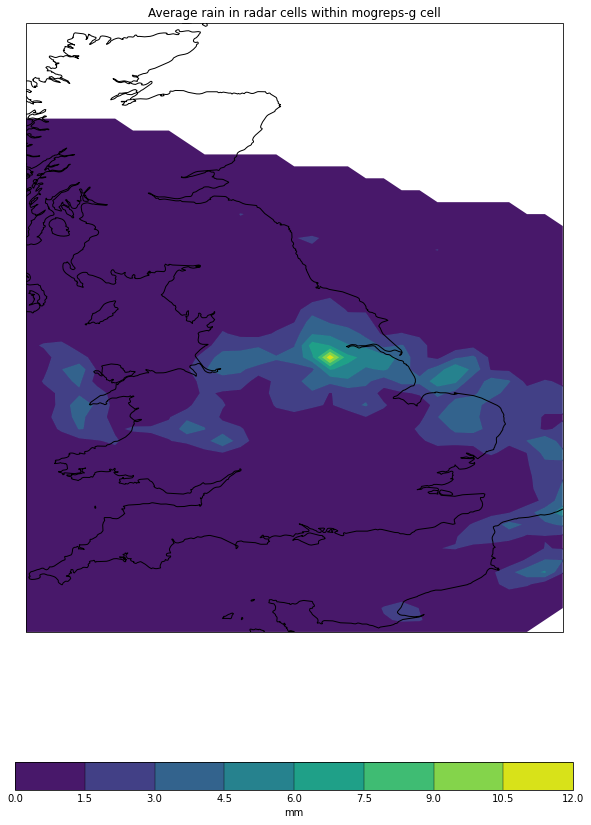

In [62]:
matplotlib.pyplot.figure(figsize=(10,16))
iris.quickplot.contourf(radar_regridded_cube_instant_mean[5,:,:])
matplotlib.pyplot.gca().coastlines()


/home/h01/shaddad/.conda/envs/prd_data_prep/lib/python3.8/site-packages/iris/coord_systems.py:525: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  return ccrs.TransverseMercator(


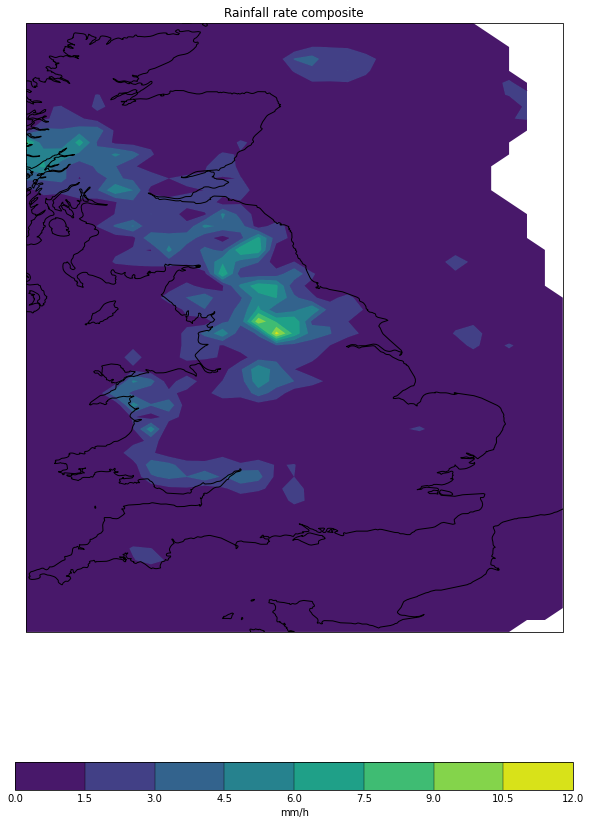

In [92]:
matplotlib.pyplot.figure(figsize=(10,16))
iris.quickplot.contourf(radar_grid_raw_cube[288,:,:].regrid(target_cube, iris.analysis.Linear()))
matplotlib.pyplot.gca().coastlines()


In [64]:
[c1 for c1 in radar_regridded_cube_instant_mean.coord('time').cells()][5]

Cell(point=cftime.DatetimeGregorian(2020, 2, 9, 0, 0, 0, 0, has_year_zero=False), bound=None)

In [77]:
[c1 for c1 in radar_grid_raw_cube.coord('time').cells()][288]

Cell(point=cftime.DatetimeGregorian(2020, 2, 9, 0, 0, 0, 0, has_year_zero=False), bound=None)

In [84]:
radar_regridded_cube_instant_mean[5,:,:].data.mean(), radar_regridded_cube_instant_mean[5,:,:].data.max()

(0.7094364559548187, 11.640192065491183)

In [83]:
radar_grid_raw_cube[288,:,:].data.mean(), radar_grid_raw_cube[288,:,:].data.max()

(0.445473187083391, 39.96875)

/home/h01/shaddad/.conda/envs/prd_data_prep/lib/python3.8/site-packages/iris/coord_systems.py:525: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  return ccrs.TransverseMercator(


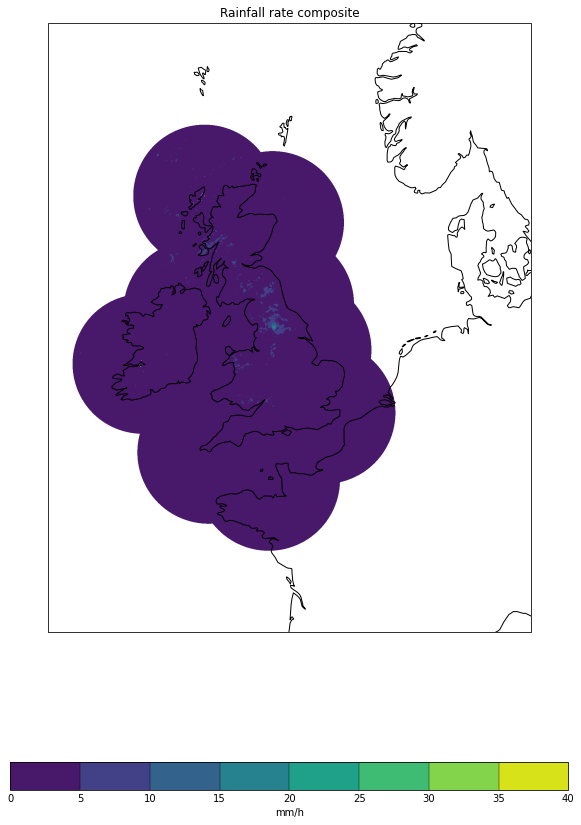

In [79]:
matplotlib.pyplot.figure(figsize=(10,16))
iris.quickplot.contourf(radar_grid_raw_cube[288,:,:])
matplotlib.pyplot.gca().coastlines()


In [ ]:
matplotlib.pyplot.figure(figsize=(10,16))
iris.quickplot.contourf(moggrepsg_ts_cube[0,:,:])
matplotlib.pyplot.gca().coastlines()

In [ ]:
radar_raw_cube1 = iris.load_cube('/scratch/shaddad/prd_debug/radar/composite_rainfall_20200214.nc')

In [ ]:
matplotlib.pyplot.figure(figsize=(10,16))
iris.quickplot.contourf(radar_raw_cube1[0,:,:])
matplotlib.pyplot.gca().coastlines()

In [ ]:
radar_cubes = iris.load(str(radar_gridded_path))

In [ ]:
radar_cubes

In [ ]:
iris.quickplot.contourf(radar_cubes.extract('radar_mean_rain_aggregate_3hr')[0][0,:,:])

In [ ]:
dir1 = pathlib.Path('/scratch/shaddad/prd_debug/')
fname_nc1 ='prd_radar_20200214T1800Z_20200217T1800Z.nc'
fname_radar =  'prd_radar_20200214T1800Z_20200217T1800Z.csv'
path_nc1 = dir1 / fname_nc1
path_radar = dir1 / fname_csv1


In [ ]:
radar_df = pandas.read_csv(path_csv1)
radar_df

In [ ]:
fname_merged = 'prd_merged_20200214T1800Z_20200217T1200Z.csv'
path_merged = dir1 / fname_merged
print(path_merged.is_file())
path_merged

In [ ]:
merged_df = pandas.read_csv(path_merged)

In [ ]:
merged_df

In [ ]:
radar_frac_agg_cols = [c1 for c1 in merged_df.columns if 'fraction' in c1 and 'agg' in c1]
radar_frac_instant_cols = [c1 for c1 in merged_df.columns if 'fraction' in c1 and 'instant' in c1]


In [ ]:
((radar_df[radar_frac_instant_cols].sum(axis='columns') < 1e-3).sum(),
( (1e-3 <= (radar_df[radar_frac_instant_cols].sum(axis='columns'))) & ((radar_df[radar_frac_instant_cols].sum(axis='columns')) <= 0.999 ) ).sum() ,
(radar_df[radar_frac_instant_cols].sum(axis='columns') >0.999).sum() 
    )

In [ ]:
((radar_df['radar_mean_rain_instant'] < 1e-3).sum(), (radar_df['radar_mean_rain_instant'] >= 1e-3).sum(), )

In [ ]:
((merged_df[merged_df['realization'] == 0][radar_frac_instant_cols].sum(axis='columns') < 1e-3).sum(),
( (1e-3 <= (merged_df[merged_df['realization'] == 0][radar_frac_instant_cols].sum(axis='columns'))) & ((merged_df[merged_df['realization'] == 0][radar_frac_instant_cols].sum(axis='columns')) <= 0.999 ) ).sum() ,
(merged_df[merged_df['realization'] == 0][radar_frac_instant_cols].sum(axis='columns') >0.999).sum() 
    )

In [ ]:
[c1 for c1 in merged_df.columns if 'radar' in c1 and 'mean' in c1]

In [ ]:
(merged_df['radar_mean_rain_instant'].isna()).sum()

In [ ]:
model_fname = 'prd_mogreps_g_006H_20200214T1800Z_20200217T1200Z.csv'
model_path = dir1 / 'mogreps-g' / model_fname

In [ ]:
model_df = pandas.read_csv(model_path)

In [ ]:
model_df

In [ ]:
merged_df['realization'].value_counts()

In [ ]:
model_df['realization'].value_counts()

In [ ]:
cube1

In [ ]:
(~cube1[0].data.mask).sum()*12

In [ ]:
radar_df[radar_frac_instant_cols].loc[45,:].sum()

In [ ]:
radar_df.loc[45,:]